In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('D:/Guvi-Loan Deafault Preiction Project/loan_default_prediction_project_complete.csv')

In [7]:
df.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 8005 non-null   object 
 2   Income                 10000 non-null  float64
 3   Employment_Status      9013 non-null   object 
 4   Location               10000 non-null  object 
 5   Credit_Score           10000 non-null  int64  
 6   Debt_to_Income_Ratio   10000 non-null  float64
 7   Existing_Loan_Balance  10000 non-null  float64
 8   Loan_Status            10000 non-null  object 
 9   Loan_Amount            10000 non-null  float64
 10  Interest_Rate          10000 non-null  float64
 11  Loan_Duration_Months   10000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [9]:
# Impute missing values with 'Unknown'
df['Gender'].fillna('Unknown', inplace=True)

print(df['Gender'].isnull().sum()) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7240\2774894870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)


0


In [10]:
# Impute missing values with 'Unknown'
df['Employment_Status'].fillna('Unknown', inplace=True)

print(df['Employment_Status'].isnull().sum())

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_7240\1612455751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment_Status'].fillna('Unknown', inplace=True)


In [11]:
df.isna().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Income                 10000 non-null  float64
 3   Employment_Status      10000 non-null  object 
 4   Location               10000 non-null  object 
 5   Credit_Score           10000 non-null  int64  
 6   Debt_to_Income_Ratio   10000 non-null  float64
 7   Existing_Loan_Balance  10000 non-null  float64
 8   Loan_Status            10000 non-null  object 
 9   Loan_Amount            10000 non-null  float64
 10  Interest_Rate          10000 non-null  float64
 11  Loan_Duration_Months   10000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [13]:
# List of ordinal categorical columns to be label encoded
ordinal_columns = ['Employment_Status']  # Example, adjust based on your dataset

# Apply Label Encoding
label_encoders = {}
for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the label encoder for future use or inverse transformation

# List of nominal categorical columns to be one-hot encoded
nominal_columns = ['Gender', 'Location']  # Example, adjust based on your dataset

# One-Hot Encoding without dropping the first column to understand the full set of generated features
encoder = OneHotEncoder(sparse_output=False, drop=None)  # **Keep all categories**
encoded_features = encoder.fit_transform(df[nominal_columns])

# Inspect the shape and content of encoded features
encoded_feature_names = encoder.get_feature_names_out(nominal_columns)
print("Encoded feature names:", encoded_feature_names)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine encoded features with the original DataFrame, excluding the original nominal columns
df_encoded = pd.concat([df.drop(nominal_columns, axis=1), encoded_df], axis=1)

# Encode the target variable 'Loan_Status'
le_status = LabelEncoder()
df_encoded['Loan_Status'] = le_status.fit_transform(df_encoded['Loan_Status'])

# Display the final DataFrame
print(df_encoded)

Encoded feature names: ['Gender_Female' 'Gender_Male' 'Gender_Unknown' 'Location_Rural'
 'Location_Suburban' 'Location_Urban']
      Age        Income  Employment_Status  Credit_Score  \
0      56  91910.323246                  0           615   
1      46  81880.547904                  2           702   
2      32  89696.082903                  1           747   
3      60  37123.175342                  2           846   
4      25  67655.479665                  1           425   
...   ...           ...                ...           ...   
9995   33  94318.593216                  0           359   
9996   29  22480.468746                  0           671   
9997   18  88172.496665                  0           441   
9998   25  51788.871823                  0           417   
9999   30  64928.131098                  0           491   

      Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                 0.462601            3580.203540            1  27160.60

In [14]:
import numpy as np

# Define numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))

# Print outlier indices
print("Outlier indices:\n", np.where(outliers))

# Removing rows with outliers
df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the number of rows before and after outlier removal
print(f'Original data size: {df.shape}')
print(f'Cleaned data size: {df_cleaned.shape}')

Outlier indices:
 (array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
Original data size: (10000, 12)
Cleaned data size: (9990, 12)


In [15]:
# Display the imbalance
print("Imbalance in Loan_Status column:\n", df['Loan_Status'].value_counts())
imbalance_ratio = df['Loan_Status'].value_counts()['Non-Default'] / df['Loan_Status'].value_counts()['Default']
print(f"Imbalance ratio: {imbalance_ratio}")

Imbalance in Loan_Status column:
 Loan_Status
Non-Default    8033
Default        1967
Name: count, dtype: int64
Imbalance ratio: 4.083884087442806


In [16]:
# Check the distribution of the target variable
class_distribution = df_encoded['Loan_Status'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 Loan_Status
1    8033
0    1967
Name: count, dtype: int64


In [17]:
# Prepare features and target variable
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the features and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Resampled class distribution:
 Loan_Status
1    8033
0    8033
Name: count, dtype: int64


In [19]:
# Separate features and target variable
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine with target variable
df_final = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Display the final DataFrame
print(df_final)

           Age    Income  Employment_Status  Credit_Score  \
0     1.108472  1.367008          -0.746622      0.254328   
1     0.366821  0.936988           2.243454      0.809073   
2    -0.671491  1.272074           0.748416      1.096011   
3     1.405132 -0.981956           2.243454      1.727273   
4    -1.190647  0.327097           0.748416     -0.957185   
...        ...       ...                ...           ...   
9995 -0.597326  1.470261          -0.746622     -1.378027   
9996 -0.893986 -1.609753          -0.746622      0.611406   
9997 -1.709802  1.206751          -0.746622     -0.855163   
9998 -1.190647 -0.353174          -0.746622     -1.008197   
9999 -0.819821  0.210164          -0.746622     -0.536344   

      Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Amount  Interest_Rate  \
0                -0.147262              -1.470994    -0.020064       0.008616   
1                 0.459540               0.946561    -0.347167      -1.280224   
2                -0.2550

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1723  670]
 [  23 2404]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      2393
           1       0.78      0.99      0.87      2427

    accuracy                           0.86      4820
   macro avg       0.88      0.86      0.85      4820
weighted avg       0.88      0.86      0.85      4820



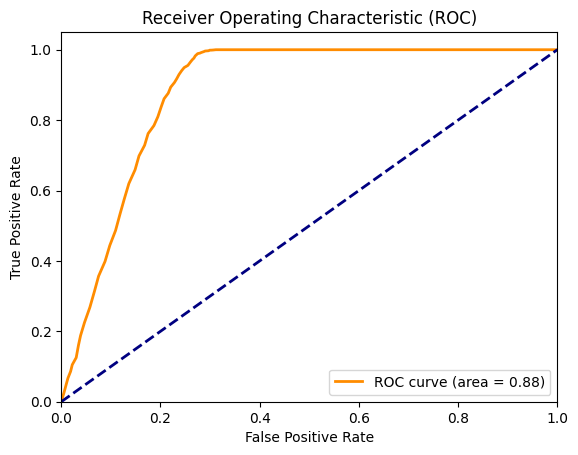

AUC-ROC Score: 0.88


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have 'model' trained and 'X_test', 'y_test' are defined

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

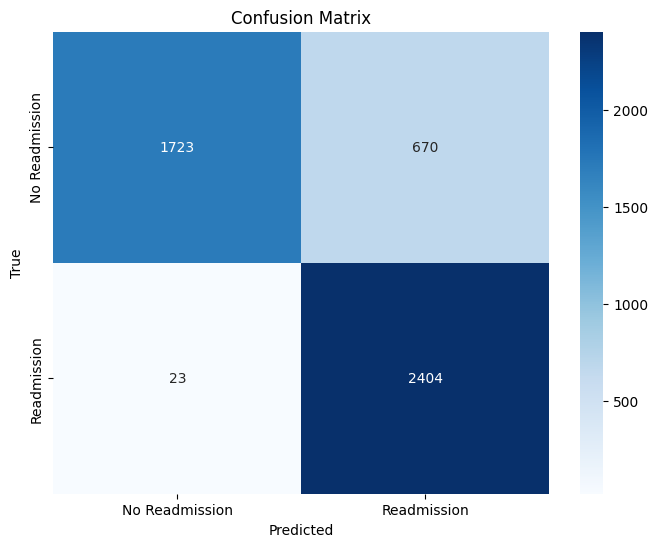

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
conf_matrix = np.array([[1723, 670],
                        [23, 2404]])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Readmission', 'Readmission'], 
            yticklabels=['No Readmission', 'Readmission'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


d:\Guvi-Loan Deafault Preiction Project\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (ROC AUC): 0.8905284306851862
Confusion Matrix:
 [[1766  627]
 [  36 2391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      2393
           1       0.79      0.99      0.88      2427

    accuracy                           0.86      4820
   macro avg       0.89      0.86      0.86      4820
weighted avg       0.89      0.86      0.86      4820



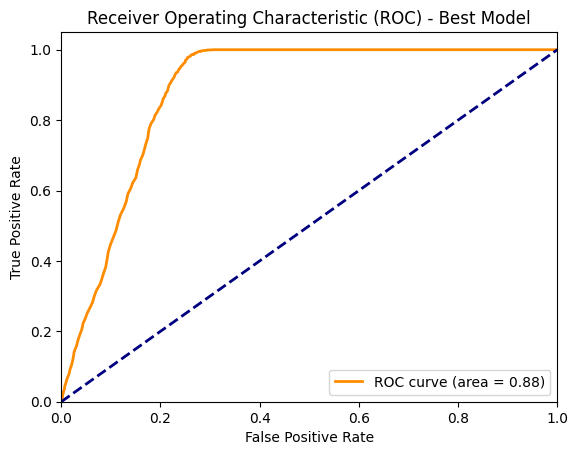

Best Model AUC-ROC Score: 0.88


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether to use bootstrap samples or not
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                         # Number of cross-validation folds
                           scoring='roc_auc',            # Scoring metric (can use 'accuracy', 'f1', etc.)
                           verbose=1,                    # Print progress
                           n_jobs=-1)                    # Use all available cores

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (ROC AUC):", best_score)

# Use the best model found
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Compute ROC curve for the best model
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Best Model')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC Score for the best model
print(f'Best Model AUC-ROC Score: {roc_auc_best:.2f}')